In [6]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json

# Load datasets
graduates_data = pd.read_csv('../data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('../data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
# P_N = students_data['P_N']  # Liczba studentów
P_N = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')


/tmp/ipykernel_4347/3397959169.py:9: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('../data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_4347/3397959169.py:10: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=False.
  students_data = p

In [7]:
# Function to map a field to a category based on keywords
def add_field_column(dataframe, column_name):
    """
    Add a new column 'Dziedzina' to the given DataFrame based on keywords in the specified column.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column containing course names.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'Dziedzina' column.
    """
    # Dictionary mapping phrases to fields
    keywords_to_dziedzina = {
        "Prawo": "Nauki prawne",
        "Psychol": "Psychologia",
        "Automat": "Automatyka",
        "Informat": "Informatyka",
        "Zarządzanie": "Zarządzanie",
        "lekarski": "Kierunek lekarski",
        "Ekonom": "Ekonomia",
        "Mechani": "Inżynieria mechaniczna",
        "Chem": "Chemia",
        "Budowni": "Inżynieria lądowa",
        "Archit": "Architektura",
        "Elektr": "Inżynieria elektryczna",
        "środowi": "Inżynieria środowiskowa",
    }
    
    # Function to assign a field based on keywords
    def assign_field(course_name):
        for keyword, field in keywords_to_dziedzina.items():
            if keyword.lower() in course_name.lower():  # Check if keyword exists in the course name
                return field
        return "Inne"  # Assign "Inne" if no match is found

    # Apply the function to create the new column
    dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)

    return dataframe

# Apply the function to the graduates_data DataFrame
graduates_data = add_field_column(graduates_data, 'P_KIERUNEK_NAZWA')

/tmp/ipykernel_4347/2849430647.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)


In [8]:
def add_adjusted_salary_columns(data, median_dict):
    """
    Adds columns to the graduates_data DataFrame where the value is
    P_ME_ZAR_P1 through P_ME_ZAR_P5 divided by the median salary based on the year in P_ROKDYP.

    Args:
        data (pd.DataFrame): The graduates_data DataFrame.
        median_dict (dict): A dictionary containing median salaries for specific years.

    Returns:
        pd.DataFrame: The updated DataFrame with the new columns.
    """
    # Define the corresponding salary and new column suffixes
    salary_columns = [f"P_ME_ZAR_P{i}" for i in range(1, 6)]
    adjusted_columns = [f"P_WWZ_P{i}" for i in range(1, 6)]

    # Function to calculate the adjusted salary for a specific column
    def calculate_adjusted_salary(row, salary_column, offset):
        year = row['P_ROKDYP'] + offset
        if year in median_dict:
            return row[salary_column] / median_dict[year]
        return None  # Return None if the year is not in the median dictionary

    # Loop through each salary column and create the corresponding adjusted column
    for i, (salary_col, adjusted_col) in enumerate(zip(salary_columns, adjusted_columns), start=1):
        offset = i  # P_ME_ZAR_P1 corresponds to +1 year, P_ME_ZAR_P2 to +2 years, etc.
        data[adjusted_col] = data.apply(lambda row: calculate_adjusted_salary(row, salary_col, offset), axis=1)

    return data

# Define the median dictionary
median = {
2014: 3291.56,
2015: 3401.11,
2016: 3510.67,
2017: 3802.82,
2018: 4094.98,
2019: 4398.82,
2020: 4702.66,
2021: 5202.14,
2022: 5701.62,
2023: 6100.81,
2024: 6500.00
}

# Add the new column to graduates_data
graduates_data = add_adjusted_salary_columns(graduates_data, median)

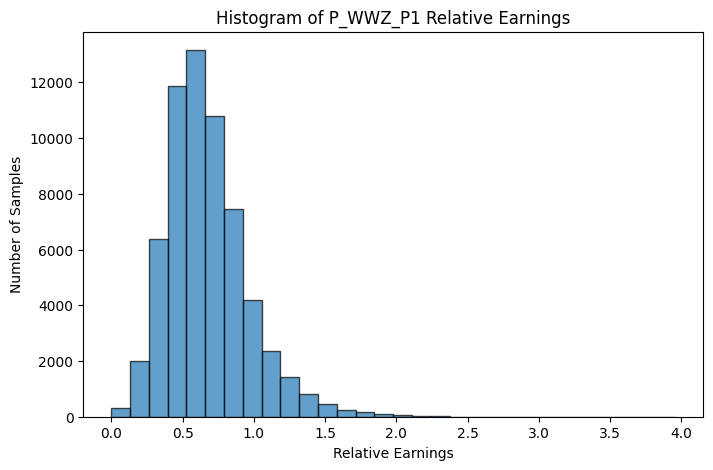

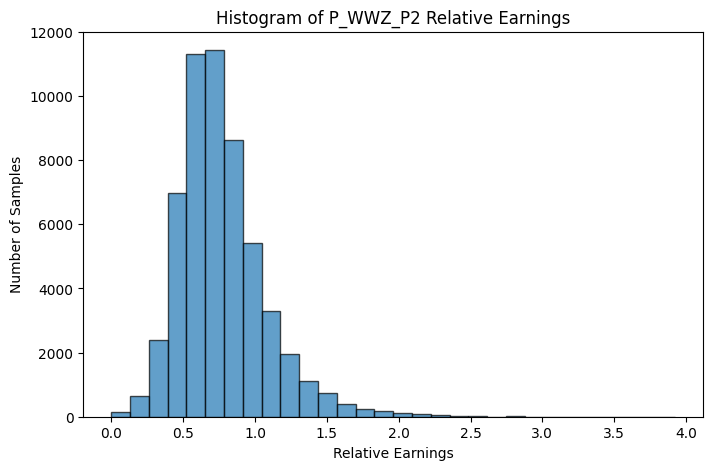

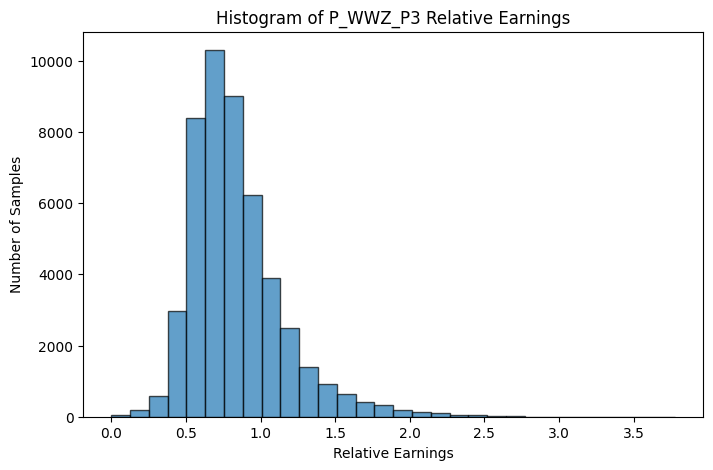

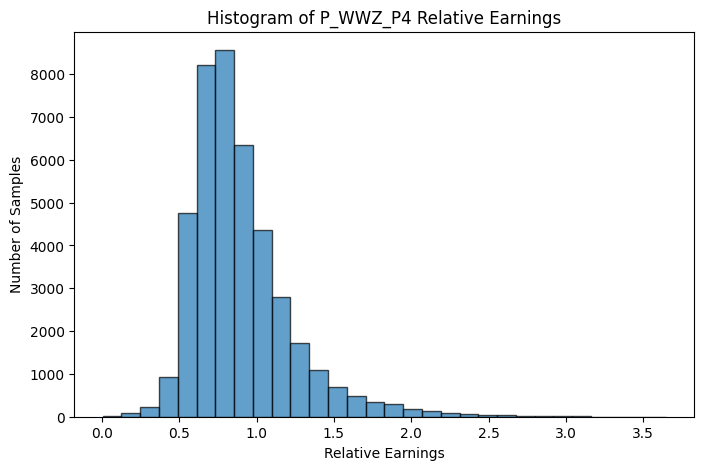

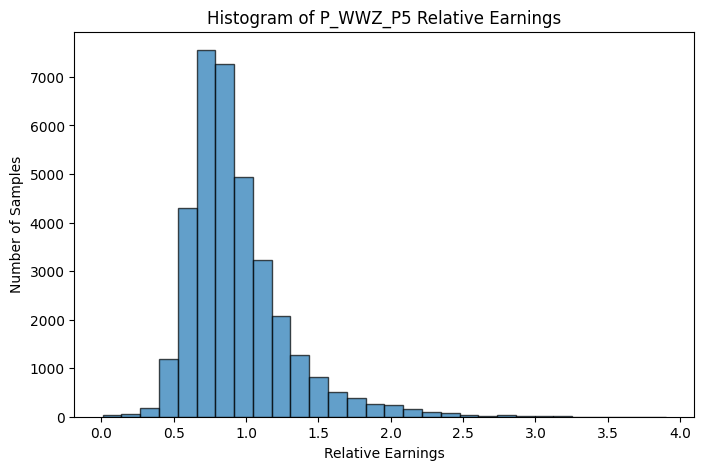

In [9]:
def plot_relative_salary_histograms(data, column_prefix="P_WWZ_P"):
    """
    Plots histograms for the relative salary columns (e.g., P_WWZ_P1 to P_WWZ_P5).

    Args:
        data (pd.DataFrame): The DataFrame containing the relative salary columns.
        column_prefix (str): The prefix of the columns to plot (default is 'P_WWZ_P').

    Returns:
        None: Displays the histograms.
    """
    # Import necessary libraries
    import matplotlib.pyplot as plt

    # Loop through the columns P_WWZ_P1 to P_WWZ_P5
    for i in range(1, 6):
        column = f"{column_prefix}{i}"
        if column in data.columns:
            # Drop NaN values for the current column
            column_data = data[column].dropna()

            # Plot the histogram
            plt.figure(figsize=(8, 5))
            plt.hist(column_data, bins=30, edgecolor='black', alpha=0.7)

            # Set plot labels and title
            plt.xlabel("Relative Earnings")
            plt.ylabel("Number of Samples")
            plt.title(f"Histogram of {column} Relative Earnings")

            # Show the plot
            plt.show()

# Example usage
plot_relative_salary_histograms(graduates_data)


In [10]:
# Create a dictionary to store mappings for each column
label_mappings = {}

# Encode variables and save mappings
for column in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    graduates_data[column] = label_encoder.fit_transform(graduates_data[column])
    
    # Store the mapping: original value -> encoded value
    label_mappings[column] = {str(original): encoded for encoded, original in enumerate(label_encoder.classes_)}

# # Save mappings to a file (optional)
# import json
with open('label_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(label_mappings, f, ensure_ascii=False, indent=4)

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for {column}:")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mapping for P_WOJ:
  2.0: 0
  4.0: 1
  6.0: 2
  8.0: 3
  10.0: 4
  12.0: 5
  14.0: 6
  16.0: 7
  18.0: 8
  20.0: 9
  22.0: 10
  24.0: 11
  26.0: 12
  28.0: 13
  30.0: 14
  32.0: 15
  nan: 16
Mapping for P_POZIOM:
  1: 0
  2: 1
  JM: 2
Mapping for P_FORMA:
  N: 0
  S: 1
Mapping for Dziedzina:
  Architektura: 0
  Automatyka: 1
  Chemia: 2
  Ekonomia: 3
  Informatyka: 4
  Inne: 5
  Inżynieria elektryczna: 6
  Inżynieria lądowa: 7
  Inżynieria mechaniczna: 8
  Inżynieria środowiskowa: 9
  Kierunek lekarski: 10
  Nauki prawne: 11
  Psychologia: 12
  Zarządzanie: 13


In [ ]:
import json

# Path to the .json file
file_path = 'label_mappings.json'

# Load the .json file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Now `data` is a regular Python dictionary
print(type(data))  # <class 'dict'>
print(data)

# Function to find a key based on a value
def get_key_from_value(mapping, value):
    reverse_mapping = {v: k for k, v in mapping.items()}
    return reverse_mapping.get(value, "Value not found")

# Example usage
value_to_find = 0
result = get_key_from_value(data['P_FORMA'], value_to_find)
print(result)

# MODELS

## STARY

In [ ]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

year = 5

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', f'P_WWZ_P{year}']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy[f'P_WWZ_P{year}']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Custom Dataset
class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define your RegressionModel
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = RegressionModel(input_dim=len(categorical_features))

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
epochs = 50  # Number of epochs
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")


# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki w {year} roku po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Reszty")
plt.title("Wykres reszt")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


sns.histplot(residuals, kde=False)
plt.title("Rozkład reszt")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()


## LSTM 1 warstwa

Train size: 8828
Validation size: 1103
Test size: 1104
Epoch [1/10] - Train Loss: 0.1194, Val Loss: 0.0377
Epoch [2/10] - Train Loss: 0.0260, Val Loss: 0.0202
Epoch [3/10] - Train Loss: 0.0182, Val Loss: 0.0169
Epoch [4/10] - Train Loss: 0.0167, Val Loss: 0.0161
Epoch [5/10] - Train Loss: 0.0161, Val Loss: 0.0159
Epoch [6/10] - Train Loss: 0.0159, Val Loss: 0.0161
Epoch [7/10] - Train Loss: 0.0158, Val Loss: 0.0179
Epoch [8/10] - Train Loss: 0.0156, Val Loss: 0.0154
Epoch [9/10] - Train Loss: 0.0156, Val Loss: 0.0155
Epoch [10/10] - Train Loss: 0.0155, Val Loss: 0.0155

*** Final Evaluation on Test Set ***
Test MSE:  0.0159
Test RMSE: 0.1262
Test MAE:  0.0860
Test MAPE: 0.0952
Test R^2:  0.9083


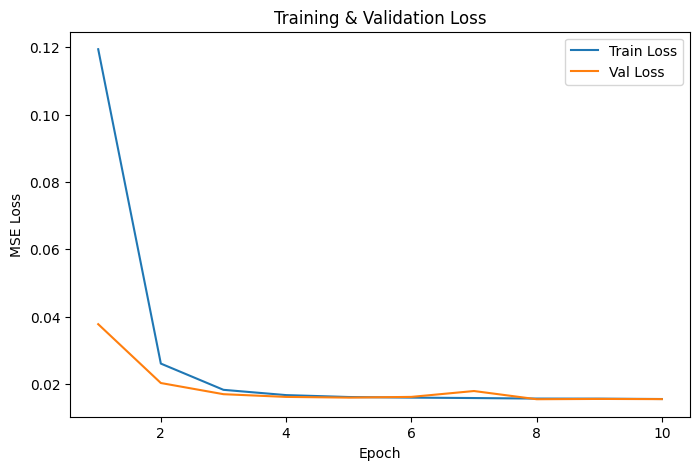

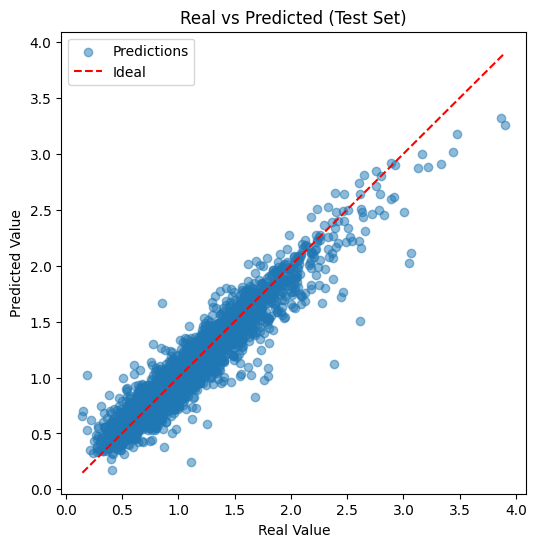

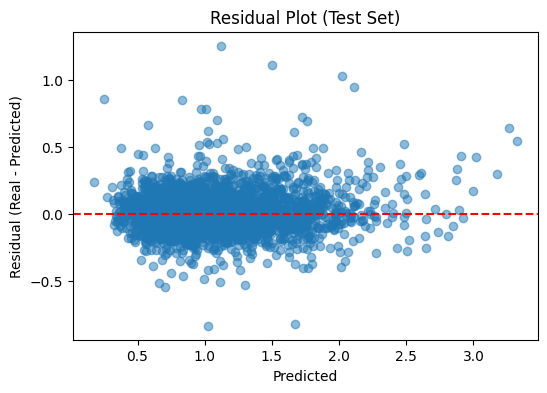

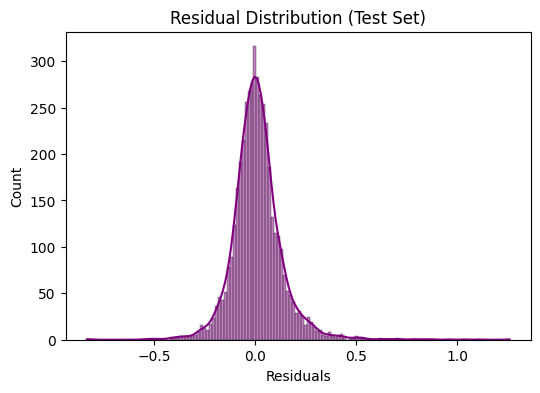

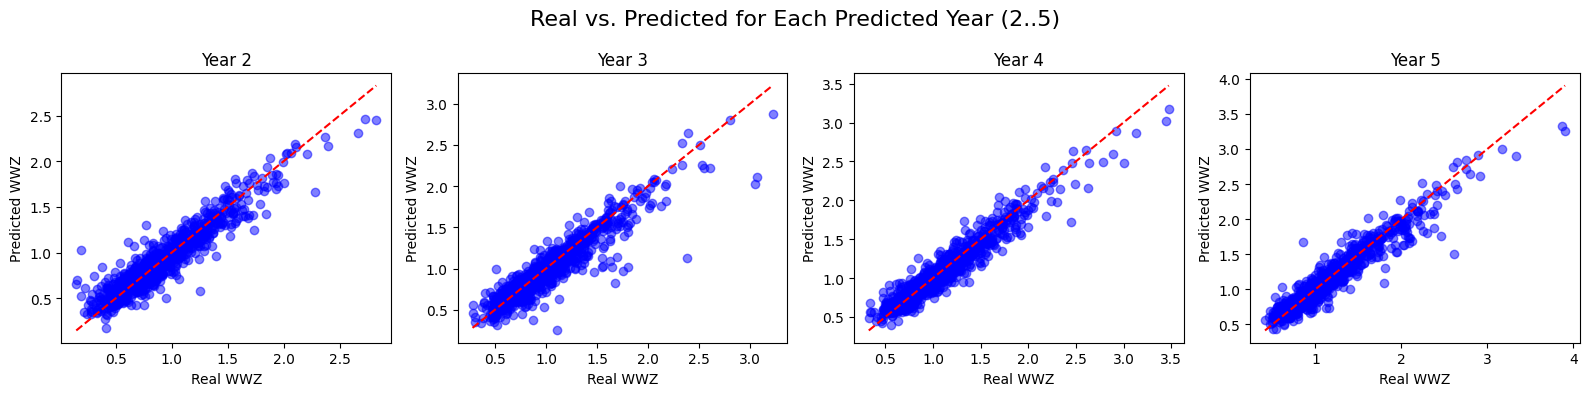

Per-Year Metrics (Years 2..5):
   Year       MSE      RMSE       MAE      MAPE        R2
0     2  0.014486  0.120359  0.085504  0.120406  0.889427
1     3  0.019835  0.140835  0.090592  0.096944  0.870023
2     4  0.012790  0.113094  0.080193  0.082156  0.927941
3     5  0.016630  0.128957  0.087518  0.081438  0.919326


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# ===================================================
# 1. Data Preparation
# ===================================================

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# ---------------------------------------
# Build sequences for each row
# ---------------------------------------
def build_sequences(row):
    """
    Builds a sequence of length 4 (features) and 4 targets from a row.
    
    For each time step t = 1..4:
      Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
      Output (Y_t) = P_WWZ_P(t+1)
    """
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    wwz_values = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    
    seq_input = []
    seq_output = []
    
    # 4 time steps => 4 input steps, 4 targets
    for t in range(4):
        year_t = t + 1
        x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
        seq_input.append(x_t)
        seq_output.append(wwz_values[t + 1])  # next year's WWZ
    
    return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim=6)
all_targets = np.array(all_targets)      # shape: (N, 4)

# # ---------------------------------------
# # 1.1 Three Splits: Train, Validation, Test
# # ---------------------------------------
# # Step 1: Split off the test set (e.g., 20%)
# X_temp, X_test, y_temp, y_test = train_test_split(
#     all_sequences, all_targets,
#     test_size=0.2, random_state=42
# )

# # Step 2: Split the remaining 80% into train/validation (e.g., 80% => 64% train, 16% val)
# # So if you want 20% test, 10% val, 70% train, you can adjust:
# #   For example, val_size=(0.2 / 0.8)=0.25 => 75% train, 25% val (of the leftover 80%).
# val_size = 0.25  # 25% of the leftover => overall 20% test, 20% val, 60% train if you prefer
# X_train, X_val, y_train, y_val = train_test_split(
#     X_temp, y_temp,
#     test_size=val_size, random_state=42
# )

X_train, X_temp, y_train, y_temp = train_test_split(
    all_sequences, all_targets,
    test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42
)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

# ===================================================
# 2. Dataset and DataLoader
# ===================================================
class GraduatesLSTMDataset(Dataset):
    """
    A custom PyTorch Dataset for LSTM-based time series.
    """
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return self.X.size(0)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Datasets for train, val, test
train_dataset = GraduatesLSTMDataset(X_train, y_train)
val_dataset   = GraduatesLSTMDataset(X_val,   y_val)
test_dataset  = GraduatesLSTMDataset(X_test,  y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

# ===================================================
# 3. LSTM Model Definition
# ===================================================
class LSTMModel(nn.Module):
    """
    A simple LSTM model for many-to-many prediction.
    The model outputs a value for each time step.
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape: (batch, seq_length, input_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
        # Final fully-connected layer maps hidden states to 1D output
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Forward pass through the LSTM.
        
        Args:
            x (Tensor): shape (batch_size, seq_length, input_dim)
        
        Returns:
            Tensor of shape (batch_size, seq_length).
        """
        lstm_out, (h_n, c_n) = self.lstm(x)
        out = self.fc(lstm_out)  # (batch_size, seq_length, 1)
        return out.squeeze(-1)   # (batch_size, seq_length)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[2]  # e.g., 6
model = LSTMModel(input_dim=input_dim, hidden_dim=64, num_layers=1)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ===================================================
# 4. Model Training (Now with Validation Set)
# ===================================================
epochs = 10
train_losses = []
val_losses   = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0.0
    
    # -----------------------------
    # Training Loop
    # -----------------------------
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        loss = criterion(preds, batch_y)
        
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item() * batch_x.size(0)
    
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    
    # -----------------------------
    # Validation Loop
    # -----------------------------
    model.eval()
    total_val_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            preds = model(batch_x)
            val_loss = criterion(preds, batch_y)
            total_val_loss += val_loss.item() * batch_x.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# ===================================================
# 5. Evaluation on the Test Set
# ===================================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real  = torch.cat(test_y_list,   dim=0).numpy()    # shape: (N_test, 4)

# Flatten for metrics
test_preds_flat = test_preds.flatten()
test_real_flat  = test_real.flatten()

# -------------------------------------
# 5.1. Metrics
# -------------------------------------
mse  = mean_squared_error(test_real_flat, test_preds_flat)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(test_real_flat, test_preds_flat)
mape = mean_absolute_percentage_error(test_real_flat, test_preds_flat)
r2   = r2_score(test_real_flat, test_preds_flat)

print("\n*** Final Evaluation on Test Set ***")
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test MAPE: {mape:.4f}")
print(f"Test R^2:  {r2:.4f}")

# -------------------------------------
# 5.2. Plots
# -------------------------------------
# (A) Training vs Validation Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1),   val_losses,   label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# (B) Real vs. Predicted scatter (Test Set)
plt.figure(figsize=(6,6))
plt.scatter(test_real_flat, test_preds_flat, alpha=0.5, label='Predictions')
plt.plot(
    [test_real_flat.min(), test_real_flat.max()],
    [test_real_flat.min(), test_real_flat.max()],
    'r--',
    label='Ideal'
)
plt.title("Real vs Predicted (Test Set)")
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

# (C) Residuals: Real - Predicted
residuals = test_real_flat - test_preds_flat

plt.figure(figsize=(6,4))
plt.scatter(test_preds_flat, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Real - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()

# (D) Residual Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

# Years that are predicted
predicted_years = [2, 3, 4, 5]

# 1) Create a plot with subplots for each predicted year
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Real vs. Predicted for Each Predicted Year (2..5)", fontsize=16)

for i, ax in enumerate(axes):
    year = predicted_years[i]       # 2, 3, 4, 5
    real_vals = test_real[:, i]     # Column i in test_real
    pred_vals = test_preds[:, i]    # Column i in test_preds

    ax.scatter(real_vals, pred_vals, alpha=0.5, color='blue')
    ax.plot(
        [real_vals.min(), real_vals.max()],
        [real_vals.min(), real_vals.max()],
        'r--'
    )
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Real WWZ")
    ax.set_ylabel("Predicted WWZ")

plt.tight_layout()
plt.show()


# 2) Create a per-year metrics table (MSE, RMSE, MAE, MAPE, R2)
metrics_rows = []
for i, year in enumerate(predicted_years):
    # Extract real and predicted columns
    real_vals = test_real[:, i]
    pred_vals = test_preds[:, i]
    
    mse  = mean_squared_error(real_vals, pred_vals)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(real_vals, pred_vals)
    mape = mean_absolute_percentage_error(real_vals, pred_vals)
    r2   = r2_score(real_vals, pred_vals)
    
    metrics_rows.append({
        "Year": year,
        "MSE":  mse,
        "RMSE": rmse,
        "MAE":  mae,
        "MAPE": mape,
        "R2":   r2
    })

df_metrics = pd.DataFrame(metrics_rows)
print("Per-Year Metrics (Years 2..5):")
print(df_metrics)

## Bidirectional LSTM

Train size: 8828
Validation size: 1103
Test size: 1104


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/3] - Train Loss: 0.0517, Val Loss: 0.0129
Epoch [2/3] - Train Loss: 0.0229, Val Loss: 0.0097
Epoch [3/3] - Train Loss: 0.0220, Val Loss: 0.0081

*** Final Evaluation on Test Set ***
Test MSE:  0.0087
Test RMSE: 0.0934
Test MAE:  0.0615
Test MAPE: 0.0653
Test R^2:  0.9498


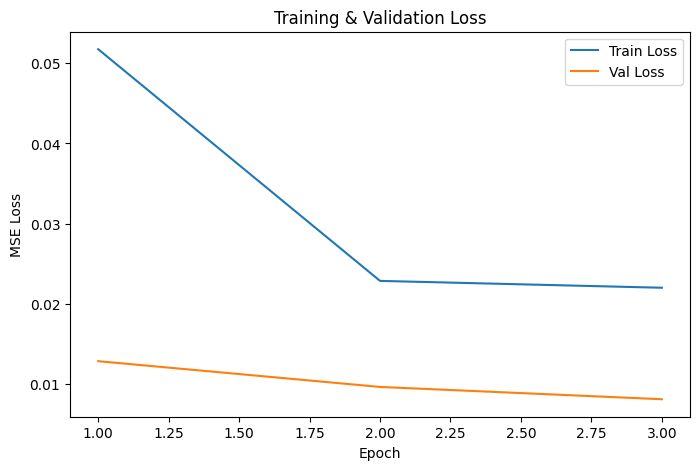

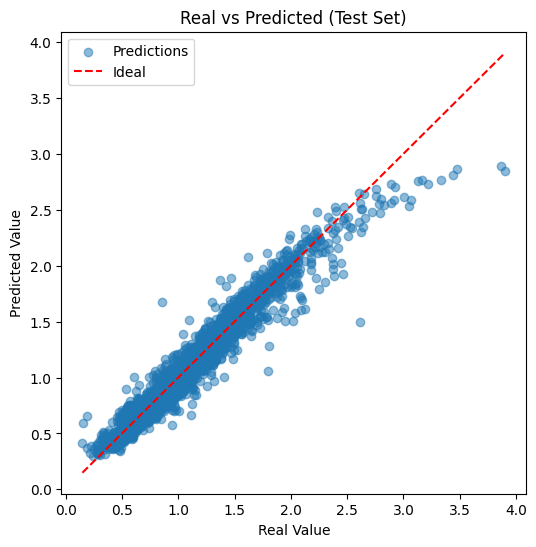

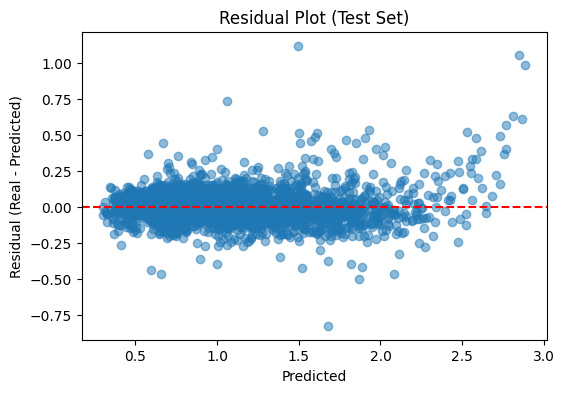

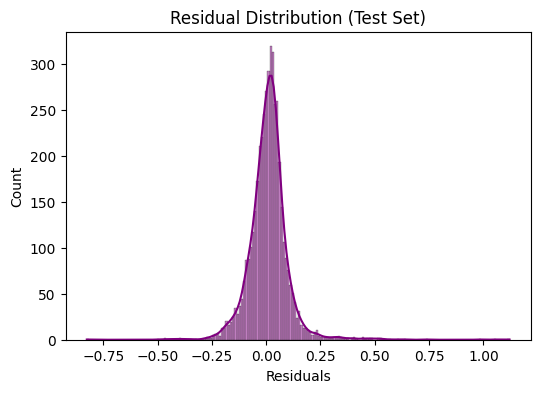

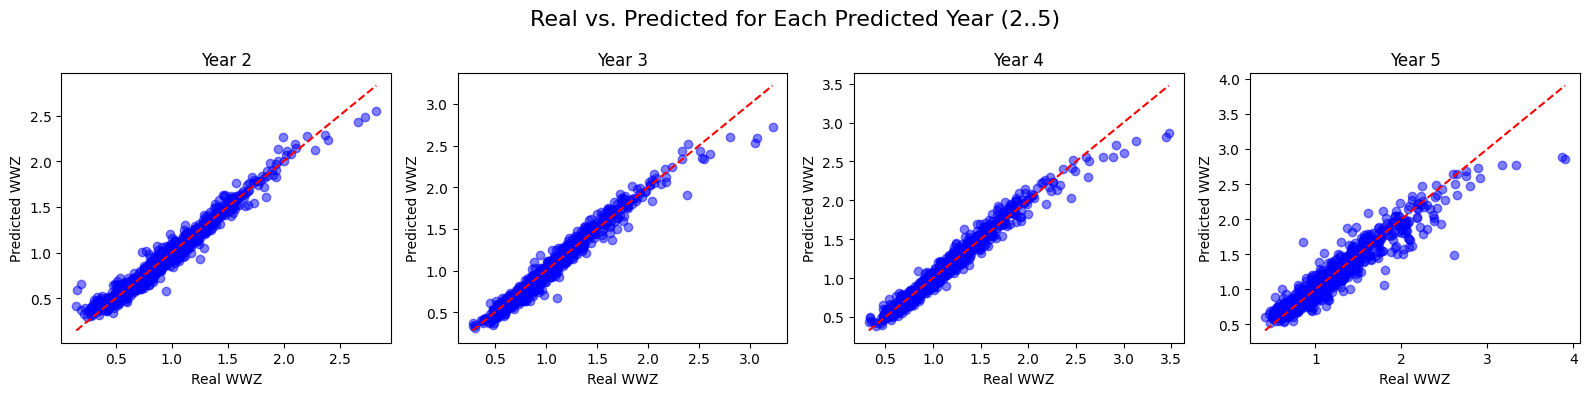

Per-Year Metrics (Years 2..5):
   Year       MSE      RMSE       MAE      MAPE        R2
0     2  0.004783  0.069161  0.049570  0.069571  0.963490
1     3  0.005243  0.072412  0.051482  0.054971  0.965639
2     4  0.005814  0.076248  0.053404  0.052748  0.967246
3     5  0.019031  0.137952  0.091374  0.084048  0.907678


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json  # if you need to load label mappings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# ===================================================
# 1. Data Preparation
# ===================================================

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

def build_sequences(row):
    """
    Builds a sequence of length 4 (features) and 4 targets from a row.
    
    For each time step t = 1..4:
      Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
      Output (Y_t) = P_WWZ_P(t+1)
    """
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    wwz_values = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    
    seq_input = []
    seq_output = []
    
    # 4 time steps => 4 input steps, 4 targets
    for t in range(4):
        year_t = t + 1
        x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
        seq_input.append(x_t)
        seq_output.append(wwz_values[t + 1])  # next year's WWZ
    
    return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)


# -----------------------------------------------------
# Build all_sequences / all_targets from DataFrame
# -----------------------------------------------------
all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim=6)
all_targets = np.array(all_targets)      # shape: (N, 4)

# ===========================================
# Step 1: Train/Test Split (80%/20%)
# ===========================================
X_train, X_temp, y_train, y_temp = train_test_split(
    all_sequences, all_targets,
    test_size=0.2, random_state=42
)

# ===========================================
# Step 2: Validation/Test Split (from 20%)
# ===========================================
# Divide the remaining 20% into equal halves
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42
)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


# ===================================================
# 2. Dataset and DataLoader
# ===================================================
class GraduatesLSTMDataset(Dataset):
    """
    A custom PyTorch Dataset for LSTM-based time series.
    """
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return self.X.size(0)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Datasets for train, val, test
train_dataset = GraduatesLSTMDataset(X_train, y_train)
val_dataset   = GraduatesLSTMDataset(X_val,   y_val)
test_dataset  = GraduatesLSTMDataset(X_test,  y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)


# ===================================================
# 3. Advanced LSTM Model Definition
# ===================================================
class AdvancedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=3, dropout=0.3):
        super(AdvancedLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Batch Normalization
        self.bn = nn.BatchNorm1d(input_dim)
        
        # Bidirectional LSTM with Dropout
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True
        )
        
        # Fully-connected layer
        self.fc = nn.Linear(hidden_dim * 2, 1)  # bidirectional => hidden_dim*2

    def forward(self, x):
        # x.shape => (batch_size, seq_length=4, input_dim=6)
        # 1) Apply BatchNorm across input_dim dimension
        batch_size, seq_length, input_dim = x.size()
        
        # Flatten the (batch*seq, input_dim), apply BN, then reshape
        x = self.bn(x.view(-1, input_dim)).view(batch_size, seq_length, input_dim)
        
        # 2) LSTM forward
        lstm_out, _ = self.lstm(x)  # shape => (batch_size, seq_length, hidden_dim*2)
        
        # 3) FC layer => (batch_size, seq_length, 1)
        out = self.fc(lstm_out)
        return out.squeeze(-1)  # => (batch_size, seq_length)


# Initialize model
input_dim = X_train.shape[2]  # should be 6
model = AdvancedLSTMModel(
    input_dim=input_dim, 
    hidden_dim=128, 
    num_layers=3, 
    dropout=0.3
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=5, factor=0.5, verbose=True
)


# ===================================================
# 4. Model Training (Now with Validation Set)
# ===================================================
epochs = 3
train_losses = []
val_losses   = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0.0
    
    # --- Training Loop ---
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item() * batch_x.size(0)
    
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # --- Validation Loop ---
    model.eval()
    total_val_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            preds = model(batch_x)
            val_loss = criterion(preds, batch_y)
            total_val_loss += val_loss.item() * batch_x.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    
    # Learning rate scheduler step
    scheduler.step(avg_val_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


# ===================================================
# 5. Evaluation on the Test Set
# ===================================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape => (N_test, 4)
test_real  = torch.cat(test_y_list,   dim=0).numpy()    # shape => (N_test, 4)

# Flatten for metrics
test_preds_flat = test_preds.flatten()
test_real_flat  = test_real.flatten()

# -------------------------------------
# 5.1. Metrics
# -------------------------------------
mse  = mean_squared_error(test_real_flat, test_preds_flat)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(test_real_flat, test_preds_flat)
mape = mean_absolute_percentage_error(test_real_flat, test_preds_flat)
r2   = r2_score(test_real_flat, test_preds_flat)

print("\n*** Final Evaluation on Test Set ***")
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test MAPE: {mape:.4f}")
print(f"Test R^2:  {r2:.4f}")


# -------------------------------------
# 5.2. Plots
# -------------------------------------
# (A) Training vs Validation Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1),   val_losses,   label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# (B) Real vs. Predicted scatter (Test Set)
plt.figure(figsize=(6,6))
plt.scatter(test_real_flat, test_preds_flat, alpha=0.5, label='Predictions')
plt.plot(
    [test_real_flat.min(), test_real_flat.max()],
    [test_real_flat.min(), test_real_flat.max()],
    'r--',
    label='Ideal'
)
plt.title("Real vs Predicted (Test Set)")
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

# (C) Residuals: Real - Predicted
residuals = test_real_flat - test_preds_flat

plt.figure(figsize=(6,4))
plt.scatter(test_preds_flat, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Real - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()

# (D) Residual Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

# Years that are predicted
predicted_years = [2, 3, 4, 5]

# 1) Create a plot with subplots for each predicted year
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Real vs. Predicted for Each Predicted Year (2..5)", fontsize=16)

for i, ax in enumerate(axes):
    year = predicted_years[i]       # 2, 3, 4, 5
    real_vals = test_real[:, i]     # Column i in test_real
    pred_vals = test_preds[:, i]    # Column i in test_preds

    ax.scatter(real_vals, pred_vals, alpha=0.5, color='blue')
    ax.plot(
        [real_vals.min(), real_vals.max()],
        [real_vals.min(), real_vals.max()],
        'r--'
    )
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Real WWZ")
    ax.set_ylabel("Predicted WWZ")

plt.tight_layout()
plt.show()


# 2) Create a per-year metrics table (MSE, RMSE, MAE, MAPE, R2)
metrics_rows = []
for i, year in enumerate(predicted_years):
    # Extract real and predicted columns
    real_vals = test_real[:, i]
    pred_vals = test_preds[:, i]
    
    mse  = mean_squared_error(real_vals, pred_vals)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(real_vals, pred_vals)
    mape = mean_absolute_percentage_error(real_vals, pred_vals)
    r2   = r2_score(real_vals, pred_vals)
    
    metrics_rows.append({
        "Year": year,
        "MSE":  mse,
        "RMSE": rmse,
        "MAE":  mae,
        "MAPE": mape,
        "R2":   r2
    })

df_metrics = pd.DataFrame(metrics_rows)
print("Per-Year Metrics (Years 2..5):")
print(df_metrics)

# # ===================================================
# # 6. Forecast for Future Years (Roll-Out)
# # ===================================================
# def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
#     """
#     Iteratively generate predictions for future_years beyond the known data (years 1..5).
#     """
#     model.eval()
    
#     num_directions = 2 if model.lstm.bidirectional else 1
#     h = torch.zeros(model.num_layers * num_directions, 1, model.hidden_dim)
#     c = torch.zeros(model.num_layers * num_directions, 1, model.hidden_dim)
    
#     # Warm up LSTM with 4 steps
#     for t in range(4):
#         x_t = torch.tensor([[
#             woj, poziom, forma, dziedz, t+1, known_wwz[t]
#         ]], dtype=torch.float32).unsqueeze(0)  
#         out, (h, c) = model.lstm(x_t, (h, c))
    
#     wwz_5 = known_wwz[4]
#     future_preds = []
#     prev_wwz = wwz_5
    
#     for i in range(future_years):
#         t_future = 5 + i
#         x_t = torch.tensor([[
#             woj, poziom, forma, dziedz, t_future, prev_wwz
#         ]], dtype=torch.float32).unsqueeze(0)
        
#         out, (h, c) = model.lstm(x_t, (h, c))
#         pred = model.fc(out)  # (1, 1, 1)
#         pred_value = pred.item()
#         future_preds.append(pred_value)
        
#         prev_wwz = pred_value
    
#     return future_preds


# def predict_future(model, row, future_years=5):
#     """
#     Retrieves known data (P_WWZ_P1..P5) from 'row' and calls rollout_prediction.
#     """
#     model.eval()
    
#     known_wwz = [
#         row['P_WWZ_P1'],
#         row['P_WWZ_P2'],
#         row['P_WWZ_P3'],
#         row['P_WWZ_P4'],
#         row['P_WWZ_P5']
#     ]
#     woj = row['P_WOJ']
#     poziom = row['P_POZIOM']
#     forma = row['P_FORMA']
#     dziedz = row['Dziedzina']
    
#     return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)


# # Example usage:
# print("\nExample single row forecast for years 6..10:")
# example_row = graduates_data_copy.iloc[1000]
# predicted_next_5 = predict_future(model, example_row, future_years=5)
# print(f"Predictions for years 6..10: {predicted_next_5}")

# # If you have label_mappings saved in JSON, you can load & invert them as you mentioned:
# # with open("label_mappings.json", "r") as file:
# #     label_mappings = json.load(file)
# # # Example decode logic ...
# # decoded_mappings = {
# #     col: {int(encoded_v): orig_v for orig_v, encoded_v in mapping.items()}
# #     for col, mapping in label_mappings.items()
# # }

# print("\nDone.")